In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import seaborn as sns

In [2]:
data=pd.read_csv("data.csv",parse_dates=True,low_memory=False)

In [3]:
data.head()

,s.no,date,Time,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2/4/2015,17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2/4/2015,17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2/4/2015,17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2/4/2015,17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2/4/2015,17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:

data.drop(['date','Time'],inplace=True,axis=1)
data.head()

,s.no,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,23.18,27.2720,426.0,721.25,0.004793,1
1,2,23.15,27.2675,429.5,714.00,0.004783,1
2,3,23.15,27.2450,426.0,713.50,0.004779,1
3,4,23.15,27.2000,426.0,708.25,0.004772,1
4,5,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   s.no           8143 non-null   int64  
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 445.4 KB


In [6]:
# Here 0 represents no person and 1 represents that some or one person is present
presence=data['Occupancy'].value_counts()
print(presence)

0    6414
1    1729
Name: Occupancy, dtype: int64


In [7]:
data.dtypes

s.no               int64
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [8]:
data.iloc[:,1:7].corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


<AxesSubplot:>

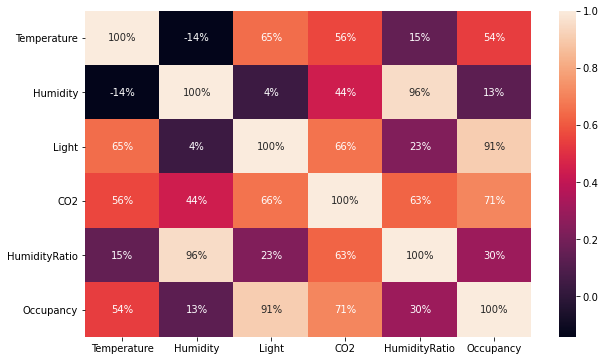

In [9]:
#visualize the correlation
plt.figure(figsize=(10,6))
sns.heatmap(data.iloc[:,1:7].corr(),annot=True ,fmt=".0%")

In [10]:
X=data.iloc[:,1:6].values
Y=data.iloc[:,6].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [13]:
def train(X_train,Y_train):
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    
    from sklearn.svm import LinearSVC
    svc_model = LinearSVC()
    svc_model.fit(X_train,Y_train)
    
    print('[0] RandomForest training accuracy:', forest.score(X_train,Y_train))
    print('[1] LinearSVC training accuracy:', svc_model.score(X_train,Y_train))
    return forest,svc_model
    

In [14]:
model=train(X_train,Y_train)

[0] RandomForest training accuracy: 0.9996725069592272
[1] LinearSVC training accuracy: 0.9867365318486983


c:\users\kesav\anaconda3\envs\god\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
#Prediction using randomforest
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,model[0].predict(X_test))
tp=cm[0][0]
tn=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]
print(cm)
print('Test Accuracy:',(tp+tn)/(tp+tn+fn+fp))

[[1590   10]
 [   6  430]]
Test Accuracy: 0.9921414538310412


In [16]:
#Prediction using LinearSVC
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,model[1].predict(X_test))
tp=cm[0][0]
tn=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]
print(cm)
print('Test Accuracy:',(tp+tn)/(tp+tn+fn+fp))


[[1578   22]
 [   9  427]]
Test Accuracy: 0.9847740667976425
